# Lab Tutorial 05
## Learning Outcomes
In this tutorial, again we will be using the randomization function we defined for the previous assignment. We will also learn to calculate new test statistics. Also, we will be playing around with p-values!

We'll be using the student performance dataset again!

# Import packages and load in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load in the dataset and display it
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Writing functions with flexible inputs (task 2)
We will be doing the exact same thing as in Assignment 4.


We want to test the hypothesis that male students are more likely than female students to take test preparation course. Under this hypothesis the p(completed|male) should be higher than p(completed|female).<br>
What is the null hypothesis?

## Write a function that calculates p(completed|female)-p(completed|male)
For now, this will be our test statistic (like in Assignment04)

In [6]:
def prob_diff(data):
    tab = pd.crosstab(data['test preparation course'] == 'completed', data['gender'], margins=True)
    p_diff = (tab['male'][True]/tab['All']["All"]) - (tab['female'][True]/tab['All']["All"])

    return p_diff

In [8]:
prob_diff(df)

np.float64(-0.010000000000000009)

## Use the same function for permutation testing with "flexible" inputs
We will modify the function a little, so that its inputs are more "flexible".<br>
When making the inputs flexible, you will have to make sure that there will be no discrepancies. For example, for the fcn input, you will write the functions that are calculating the stat. All of those functions should have the same number and type of inputs and outputs.

In [16]:
def permutation_test(data, stat_fnc = prob_diff, shuffle_var='gender', numIter = 100):
    stat = np.zeros(numIter, dtype="float64")

    i=0
    while i < numIter:

        tmpDf = data.copy()
        sInd = np.array(range(len(tmpDf.index))) #randomly shuffling the indices in the dataset => creating a

        np.random.shuffle(sInd)

        tmpGender = np.random.permutation(tmpDf[shuffle_var].values)

        tmpDf[shuffle_var] = tmpGender

        stat[i] = stat_fnc(tmpDf)

        i+=1
    
    plt.figure()
    plt.hist(stat, bins = 10)
    plt.xlabel("Test Statistic")
    plt.ylabel("Frequency")
    empStat  = stat_fnc(data)
    plt.axvline(x=empStat, color='r')
    plt.show()
    p_value = sum(stat >= empStat)/numIter
    print(f"P-value of the randomization test is p={p_value}")

    return p_value

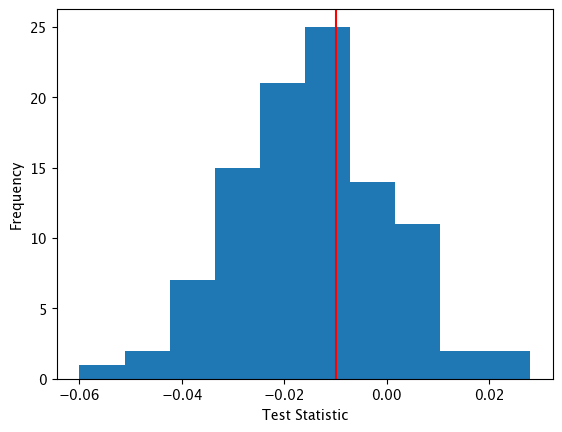

P-value of the randomization test is p=0.36


In [17]:
p = permutation_test(df)

## <font color = 'red'> What is the p-value? (Slide 2)
* P-value is defined as the probability of rejecting H0 conditional on the H0 being true.
* It holds no information about what happens if HA was true.
    
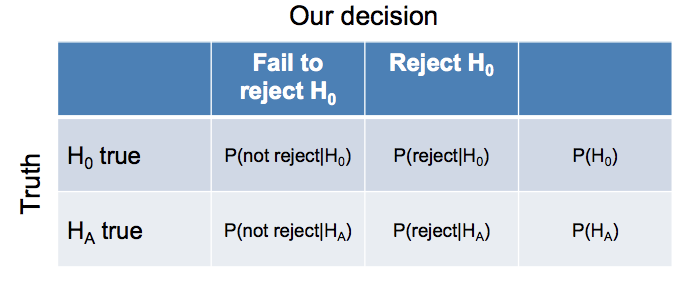

### Given the definition of the p-value and the hypothesis you are testing, what is the calculated p-value telling you?

# 2. Now lets test another hypothesis
The hypothesis we'll be testing is as follows:<br>
Parental level of education and sompleting the test preparation course by the student are dependent. Completing test preparation course vary by parental level of education.

What is the null hypothesis in this case?


## To test idependence, we will be usig Chi-squared test of independence! (slides: [5:10])
You will need to write a function that calculates the Chi-squared statistic.

The chi2-test statistics measures the deviation between the observed counts for each cell and the expected counts under the Null-hypothesis. In this case it will be calculating the deviation between the observed value and expected value under the null hypothesis that parental level and taking the test preparation course are independent. 

Calculation steps are as follows:


### 2.1. Create a contingency table with parental level of education and test preparation course as rows and columns
This table will be given you the __"Observed"__ values

In [21]:
# The observed values in a contingency table!
observed_tab = pd.crosstab(df['parental level of education'], df['test preparation course'], margins=False)
observed_tab

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


### 2.2. Convert the table to a numpy array
To calculate the deviation between the observed and expected values, we will be doing a simple subtraction. It would be much easier if we have the observed variable in form of a numpy array, so that we are able to do the operations on numpy arrays (matrices).

In [22]:
# The observed values in a numpy array (matrix)
observed_array = np.array(observed_tab)
observed_array

array([[ 82, 140],
       [ 46,  72],
       [ 56, 140],
       [ 20,  39],
       [ 77, 149],
       [ 77, 102]])

### 2.3 Generate a table that shows the expected frequencies if test preparation course and parental level of education were independen (Slide 7)
Expected count(A,B) = Marginal counts (A)  * Marginal counts (B) / table total

#### First take a look at the contingency table again

In [24]:
# First let's take a look at the contingency table again
[r, c] = observed_array.shape
expected_array = np.zeros([r,c])
expected_array

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

#### Now let's take a look at the numpy array version of it

In [25]:
# See the correspondence between the numpy array and the contingency table


array([358, 642])

#### <font color = 'red'> Now let's _Initialize_ the numpy array which will be holding the expected values!
it will be the same size as the array for the observed values

In [6]:
# first get the dimensions of the observed_array


### 2.4 You'll be filling in the expected values using a loop
* initialize the array before the loop
* use the number of rows and columns (r and c) to loop through all the elements

Here, as an example, we will calculate the expected value for one of the entries.<br>
_Hint_ : Use indices to get the elements that you want and also to fill in the elements in the expected array

In [7]:
# Now as an example, let's calculate the expected count for 'high school degree' and 'completed'
# Expected count(A,B) = Marginal counts (A)  * Marginal counts (B) / table total
# first let's take a look at the variables again


#### To get the marginal counts, you will need to use python's sum()
The following link gives you a definition for all of python's built-in functions:<br>
https://docs.python.org/3/library/functions.html

Let's see how the sum() function works:


In [26]:
# Apply sum() to observed_array (2-D array)
## It returs the sum of all the elements on the columns
### so the first element will be the sum of elements on the first column and so forth ...
S = sum(observed_array)

In [27]:
# What will sum() do if its input is 1D?
sum(S)

np.int64(1000)

In [30]:
# Now calculate the expected value for high school and completed!
expected_array[2,0] = sum(observed_array[2,:])*sum(observed_array[:0]/sum(sum(observed_array)))
expected_array

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [29]:
sum(observed_array[2,:])

np.int64(196)

<font color = 'red'> Loop through elements with indexing and do the same thing as above 

### 2.5 The deviation will be calculated as follows:
$χ^2 = \sum_i(O_i-E_i)^2/E_i)$

You can just apply math operations like subtraction, addition, etc. to the elements of a numpy array.

Basically, we will be calculating the difference, raise the difference to the power of two and divide that by the second numpy array!

In [32]:
# print both arrays
D = observed_array - expected_array
D2 = D**2

In [12]:
# Calculate the difference between the arrays


In [33]:
# square!
## see how the operation is performed element-wise
D2

array([[ 6724., 19600.],
       [ 2116.,  5184.],
       [ 3136., 19600.],
       [  400.,  1521.],
       [ 5929., 22201.],
       [ 5929., 10404.]])

In [34]:
# divide by the expected array
## now here, as we have zeros in the expected_array we will get ZeroDivisionError or you might get a warning
D2/expected_array

/var/folders/m7/x0qbfd55451fl063_lpv3kxm0000gn/T/ipykernel_55882/3052935223.py:3: RuntimeWarning: divide by zero encountered in divide
  D2/expected_array


array([[inf, inf],
       [inf, inf],
       [inf, inf],
       [inf, inf],
       [inf, inf],
       [inf, inf]])

In [35]:
sum(sum(D2/expected_array))

/var/folders/m7/x0qbfd55451fl063_lpv3kxm0000gn/T/ipykernel_55882/2278585442.py:1: RuntimeWarning: divide by zero encountered in divide
  sum(sum(D2/expected_array))


np.float64(inf)

### 2.6 Put the expected value into a contingency table (optional)
You may want to create a table of the expected value!

In [15]:
# create a dataframe
expected_tab = pd.DataFrame(expected_array)
expected_tab.columns = observed...

# 3. Monte-carlo Simulation
Write a function (monteCarloSim) that simulates coin tossing. On each trial, the function should produce a specific number (N) of coin tosses and record the number of successes (heads). It should repeat this experiment numIter number of times. The inputs to the function should be a) probability of a success on each coin toss, b) the number of coin tosses per trial (N) and c) the number of trials. The function should return an np.array(range(numIter)) that holds the recorded number of heads for all trials (see lecture handout for tips).

monteCarloSim(a=probability,N=numberOfCoin,numIter)<br>
    for numIter<br>
        $\;\;\;\;$Generate new sample of N coin tosses<br>
        $\;\;\;\;$record number of heads in array X<br>        
        
**What are the inputs?**
* probability of H0. Probability array will be calculated based on this single value
* Number of heads (successes). Be careful with how you define success. success could mean complication!
* number of times you want to simulate the coin toss (same as numIter).

## 3.1 Generate a specific number of 1s and 0s (as heads and tails)
to simulate coin tosses, we will use numpy.random.choice:<br>
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

Let's take a look at np.random.choice options <br>
numpy.random.choice(a, size=None, replace=True, p=None).

In [16]:
# To draw numbers with specific probability values, your first input should be a 1D array and the the p input 
# will be an array with the same size.
# To simulate coin tosses, lets assume that heads are 1s and tails are 0s.
# if a coin is fair before tossing we know that the probability of head is 0.5.

# be careful when you are creating the numpy array for probabilities!
# If my first input to np.random.choice is [0, 1], then the first element in p is the probability of 0 (tails/failiure)!

## 3.2 Record the number of heads (successes) for an iteration
Remember, again you need to do the whole thing numIter times. For each iteration, calculate the number of heads and record it in an array! (you have to initialize the array before the loop for numIter)

In [17]:
# we have an array of only 0s and 1s.
# the number of 1s (the number of heads/sucesses) will be:


# 4. Monte-carlo Test

Write a function (monteCarloTest) that uses monteCarloSim to 
* simulate 1000 trials (coin tosses). numIter input to Monte-carlo simulation function. 
* The function should also plot a histogram of the recorded number of heads, and mark the real measured number with a vertical line (axvline). Heads are usually success. You can define success to be different things depending on the question! Complication can be success!
* The function should print out the probability that the simulated number of heads is smaller than or equal to the measured number of heads. 

Input arguments should be 
a) the probability of a success under the Null-hypothesis, 
b) the number of coin tosses per trial, and 
c) the measured number of heads. Use the function to evaluate the probability to get 3 complications in 62 cases if the probability of a complication in the population is known to be 10%.